# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('nova_demo.csv')
df

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,F,N,Y,0,Working,Secondary / secondary special,Civil marriage,House / apartment,54.109589,9.884932,1,0,0,0,2.0,True
16646,F,N,Y,0,Commercial associate,Secondary / secondary special,Married,House / apartment,43.389041,7.380822,1,1,1,0,2.0,True
16647,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,True
16648,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,True


In [5]:
df.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object

Filtrando colunas objetos:

In [8]:
df.sexo.unique()

array(['M', 'F'], dtype=object)

In [10]:
df.posse_de_veiculo.unique()

array(['Y', 'N'], dtype=object)

In [12]:
df.posse_de_imovel.unique()

array(['Y', 'N'], dtype=object)

In [14]:
df.tipo_renda.unique()

array(['Working', 'Commercial associate', 'State servant', 'Pensioner',
       'Student'], dtype=object)

In [16]:
df.educacao.unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [18]:
df.estado_civil.unique()

array(['Married', 'Single / not married', 'Civil marriage', 'Widow',
       'Separated'], dtype=object)

In [20]:
df.tipo_residencia.unique()

array(['House / apartment', 'Rented apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [22]:
novo_df = pd.get_dummies(df, columns=['tipo_renda','educacao', 'estado_civil', 'tipo_residencia'], drop_first = False)
novo_df

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,M,Y,Y,0,58.832877,3.106849,1,0,0,0,...,True,False,False,False,False,True,False,False,False,False
1,F,N,Y,0,52.356164,8.358904,1,0,1,1,...,False,False,True,False,False,True,False,False,False,False
2,F,N,Y,0,52.356164,8.358904,1,0,1,1,...,False,False,True,False,False,True,False,False,False,False
3,M,Y,Y,0,46.224658,2.106849,1,1,1,1,...,True,False,False,False,False,True,False,False,False,False
4,F,Y,N,0,29.230137,3.021918,1,0,0,0,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,F,N,Y,0,54.109589,9.884932,1,0,0,0,...,False,False,False,False,False,True,False,False,False,False
16646,F,N,Y,0,43.389041,7.380822,1,1,1,0,...,True,False,False,False,False,True,False,False,False,False
16647,M,Y,Y,0,30.005479,9.800000,1,1,0,0,...,True,False,False,False,False,True,False,False,False,False
16648,M,Y,Y,0,30.005479,9.800000,1,1,0,0,...,True,False,False,False,False,True,False,False,False,False


In [24]:
novo_df.dtypes

sexo                                       object
posse_de_veiculo                           object
posse_de_imovel                            object
qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                          bool
tipo_renda_Commercial associate              bool
tipo_renda_Pensioner                         bool
tipo_renda_State servant                     bool
tipo_renda_Student                           bool
tipo_renda_Working                           bool
educacao_Academic degree                     bool
educacao_Higher education                    bool
educacao_Incomplete higher                   bool


In [26]:
novo_df.sexo = novo_df.sexo.map({'M':0,'F':1})
novo_df.posse_de_veiculo  = novo_df.posse_de_veiculo .map({'N':0,'Y':1})
novo_df.posse_de_imovel = novo_df.posse_de_imovel.map({'N':0,'Y':1})

In [28]:
novo_df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,1,1,0,58.832877,3.106849,1,0,0,0,...,True,False,False,False,False,True,False,False,False,False
1,1,0,1,0,52.356164,8.358904,1,0,1,1,...,False,False,True,False,False,True,False,False,False,False
2,1,0,1,0,52.356164,8.358904,1,0,1,1,...,False,False,True,False,False,True,False,False,False,False
3,0,1,1,0,46.224658,2.106849,1,1,1,1,...,True,False,False,False,False,True,False,False,False,False
4,1,1,0,0,29.230137,3.021918,1,0,0,0,...,True,False,False,False,False,True,False,False,False,False


In [30]:
novo_df.mau = novo_df.mau.astype(int)
novo_df['tipo_renda_Commercial associate'] = novo_df['tipo_renda_Commercial associate'].astype(int)
novo_df.tipo_renda_Pensioner = novo_df.tipo_renda_Pensioner.astype(int)
novo_df['tipo_renda_State servant'] = novo_df['tipo_renda_State servant'].astype(int)
novo_df.tipo_renda_Student = novo_df.tipo_renda_Student.astype(int)
novo_df.tipo_renda_Working = novo_df.tipo_renda_Working.astype(int)
novo_df['educacao_Academic degree'] = novo_df['educacao_Academic degree'].astype(int)
novo_df['educacao_Higher education'] = novo_df['educacao_Higher education'].astype(int)
novo_df['educacao_Incomplete higher'] = novo_df['educacao_Incomplete higher'].astype(int)
novo_df['educacao_Lower secondary'] = novo_df['educacao_Lower secondary'].astype(int)
novo_df['educacao_Secondary / secondary special'] = novo_df['educacao_Secondary / secondary special'].astype(int)
novo_df['estado_civil_Civil marriage'] = novo_df['estado_civil_Civil marriage'].astype(int)
novo_df.estado_civil_Married = novo_df.estado_civil_Married.astype(int)
novo_df.estado_civil_Separated = novo_df.estado_civil_Separated.astype(int)
novo_df['estado_civil_Single / not married'] = novo_df['estado_civil_Single / not married'].astype(int)
novo_df.estado_civil_Widow = novo_df.estado_civil_Widow.astype(int)
novo_df['tipo_residencia_Co-op apartment'] = novo_df['tipo_residencia_Co-op apartment'].astype(int)
novo_df['tipo_residencia_House / apartment'] = novo_df['tipo_residencia_House / apartment'].astype(int)
novo_df['tipo_residencia_Municipal apartment'] = novo_df['tipo_residencia_Municipal apartment'].astype(int)
novo_df['tipo_residencia_Office apartment'] = novo_df['tipo_residencia_Office apartment'].astype(int)
novo_df['tipo_residencia_Rented apartment'] = novo_df['tipo_residencia_Rented apartment'].astype(int)
novo_df['tipo_residencia_With parents'] = novo_df['tipo_residencia_With parents'].astype(int)

novo_df.dtypes

sexo                                        int64
posse_de_veiculo                            int64
posse_de_imovel                             int64
qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                         int32
tipo_renda_Commercial associate             int32
tipo_renda_Pensioner                        int32
tipo_renda_State servant                    int32
tipo_renda_Student                          int32
tipo_renda_Working                          int32
educacao_Academic degree                    int32
educacao_Higher education                   int32
educacao_Incomplete higher                  int32


In [42]:
novo_df.count()

sexo                                      16650
posse_de_veiculo                          16650
posse_de_imovel                           16650
qtd_filhos                                16650
idade                                     16650
tempo_emprego                             16650
possui_celular                            16650
possui_fone_comercial                     16650
possui_fone                               16650
possui_email                              16650
qt_pessoas_residencia                     16650
mau                                       16650
tipo_renda_Commercial associate           16650
tipo_renda_Pensioner                      16650
tipo_renda_State servant                  16650
tipo_renda_Student                        16650
tipo_renda_Working                        16650
educacao_Academic degree                  16650
educacao_Higher education                 16650
educacao_Incomplete higher                16650
educacao_Lower secondary                

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [72]:
y = novo_df.mau
X = novo_df.drop('mau', axis = 1)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [76]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train,y_train)

y_chapeu_teste = clf.predict(X_test)
print(y_chapeu_teste)

[0 0 0 ... 0 0 0]


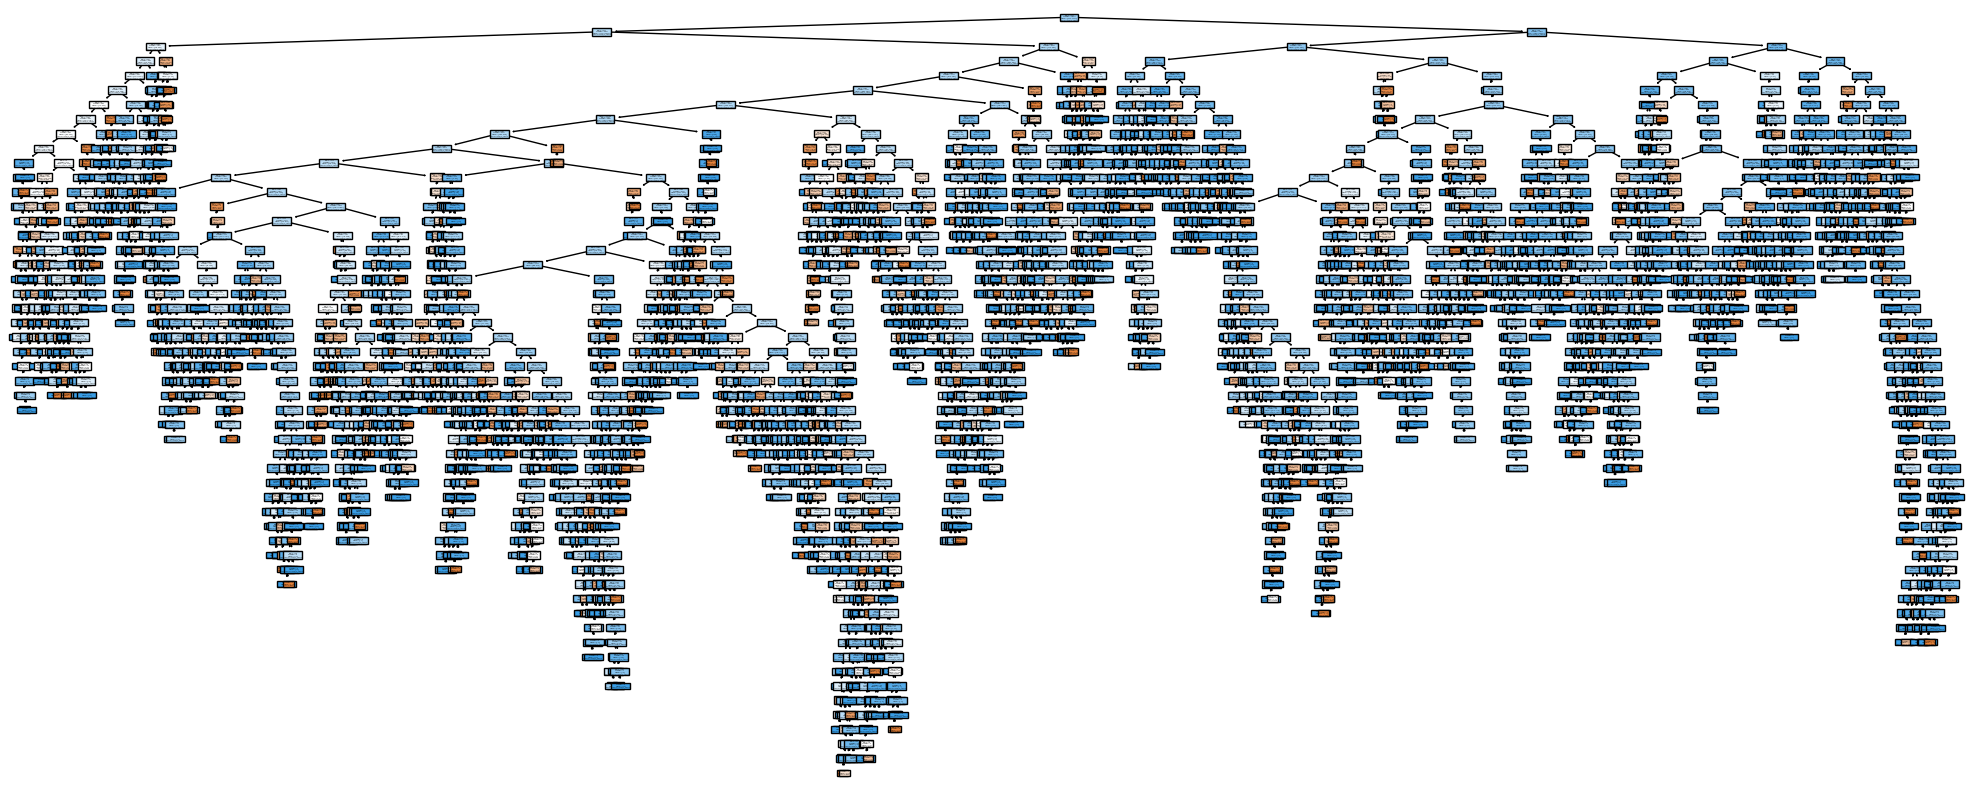

In [40]:
clf = clf.fit(X[['mau']],y)

plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['mPagador', 'bPagador'],
          feature_names=['mau']);

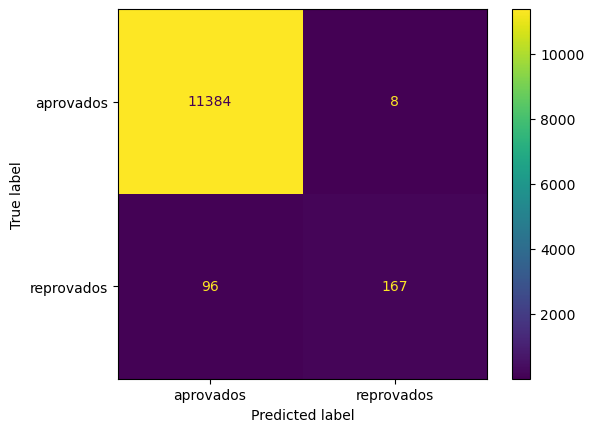

In [60]:
cm = confusion_matrix(y_train, clf.predict(X_train), labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['aprovados', 'reprovados'])

MatrizDeConfusao.plot()

In [82]:
X_test.shape

(4995, 32)

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?